# “体质体检”与“ 过程性评价”数据结果对比分析


点击“隐藏代码”，可隐藏代码：

In [1]:
import IPython.core.display as di
#这部分程序将会在下方加一个按钮以选择是否隐藏代码
di.display_html('''<button onclick="jQuery('.input_area').toggle();jQuery('.prompt').toggle();">隐藏代码</button>''',raw=True)

隐藏代码

对于数据字段缩写的说明：

* tztj-“体质体检”数据（数据量：25万）

* 1718-“过程性评价”数据（数据量：400）

* Grade-年级（7：初一， 8：初二）

* Gender-性别（M：男，F：女）

* 50m_grade-“ 50m”项目测试成绩（单位：秒）

* 50m_point-“50m”项目测试得分(百分制)

* TS_grade-“跳绳”项目测试成绩（单位：下）

* TS_point-“跳绳”项目测试得分（百分制）

* LDTY_grade-“立定跳远”项目测试成绩（单位：cm）

* LDTY_point-“立定跳远”项目测试得分（百分制）

* YTXS_point-“引体向上”项目测试得分（百分制）

* count-总数（数据总数目）

* mean-平均数

* std-标准差

* min-最小值

* 25%-25%处数值（下四分位数）

* 50%-50%处数值（中值，中位数）

* 75%-75%处数值（上四分位数）

* max-最大值


In [2]:
# 导入工具包
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 一、 体质体检（tztj）数据分析

首先总体看一下“体质体检”数据的大致分布，有个了解：

In [3]:
# 导入数据库
data_origin = pd.read_csv("/Users/yawenhan/Documents/Python/盛学原始数据/tztj_grade7and8.csv")
dfo = pd.DataFrame(data_origin)
dfo.describe()

,Grade,50m_grade,50m_point,TS_grade,TS_point,LDTY_grade,LDTY_point,YTXS_point
count,265172.000000,249744.000000,249744.000000,1171.000000,1171.000000,252824.000000,252824.000000,133717.000000
mean,7.890192,8.547133,80.283042,126.111016,77.228864,180.737264,72.251009,33.376773
std,0.812937,1.012675,15.695669,36.075059,18.789992,36.059923,19.584888,33.000374
min,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.900000,72.000000,105.000000,70.000000,165.000000,66.000000,0.000000
50%,8.000000,8.500000,78.000000,129.000000,78.000000,180.000000,76.000000,30.000000
75%,9.000000,9.130000,95.000000,151.000000,90.000000,200.000000,85.000000,60.000000
max,9.000000,20.000000,100.000000,236.000000,100.000000,360.000000,100.000000,100.000000


由于“过程性评价”中初一、初二测试项目不同，在对比“体质体检”和“过程性评价”两组数据时，先将“体质体检”和“过程性评价”数据分为初一、初二两部分进行分析，之后再将初一、初二两部分数据综合起来进行分析。

### 1）体质体检（tztj）初一数据

提取“体质体检”初一 数据：

In [4]:
#提取“体质体检”初一 数据
data_origin7=data_origin[data_origin['Grade']==7]
do7=data_origin7.describe()
do7

,Grade,50m_grade,50m_point,TS_grade,TS_point,LDTY_grade,LDTY_point,YTXS_point
count,103779.0,100355.000000,100355.000000,1171.000000,1171.000000,100563.000000,100563.000000,53161.000000
mean,7.0,8.812355,78.506352,126.111016,77.228864,173.485288,72.838668,27.228438
std,0.0,0.981378,16.495233,36.075059,18.789992,31.300050,18.409762,29.907969
min,7.0,5.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.0,8.160000,72.000000,105.000000,70.000000,160.000000,66.000000,0.000000
50%,7.0,8.730000,78.000000,129.000000,78.000000,175.000000,76.000000,30.000000
75%,7.0,9.400000,90.000000,151.000000,90.000000,190.000000,85.000000,50.000000
max,7.0,20.000000,100.000000,236.000000,100.000000,360.000000,100.000000,100.000000


首先对“体质体检”的初一数据进行分析，只分析与“过程性评价”相同的测试项目“50m”，“跳绳”，“立定跳远”，和“引体向上”（引体向上只有得分，没有成绩）。上表显示了数据量，平均值，标准差，最大，最小，25%，中值，75%等信息。

### 2）体质体检（tztj）初二数据

提取“体质体检”初二数据：

In [5]:
#提取“体质体检”初二数据
data_origin8=data_origin[data_origin['Grade']==8]
do8=data_origin8.describe()
do8

,Grade,50m_grade,50m_point,TS_grade,TS_point,LDTY_grade,LDTY_point,YTXS_point
count,86732.0,81179.000000,81179.000000,0.0,0.0,82666.000000,82666.0000,43219.000000
mean,8.0,8.512922,80.294633,NaN,NaN,181.572046,71.9351,33.321965
std,0.0,0.965212,15.281893,NaN,NaN,35.963322,19.9250,32.413107
min,8.0,5.000000,0.000000,NaN,NaN,0.000000,0.0000,0.000000
25%,8.0,7.880000,72.000000,NaN,NaN,165.000000,66.0000,0.000000
50%,8.0,8.450000,78.000000,NaN,NaN,182.000000,74.0000,20.000000
75%,8.0,9.100000,90.000000,NaN,NaN,201.000000,85.0000,60.000000
max,8.0,20.000000,100.000000,NaN,NaN,345.000000,100.0000,100.000000


其次对“体质体检”的初二数据进行分析，只分析与“过程性评价”相同的测试项目“50m”，“跳绳”，“立定跳远”，和“引体向上”（引体向上只有得分，没有成绩）。上表显示了数据量，平均值，标准差，最大，最小，25%，中值，75%等信息。
*  注意：上表中“跳绳”的所有成绩与得分均为NaN（空值），表示“体质体检”数据库中并没有初二学生的“跳绳”成绩和得分， 或初二学生“体质体检”不含“跳绳”项目（但初一学生“体质体检”中含有“跳绳”项目）。

## 二、过程性评价（1718）数据分析

首先总体看一下“过程性评价”数据的大致分布，有个了解：

### 1）过程性评价（1718）初一数据

提取“过程性评价”初一数据：

In [6]:
# 提取“过程性评价”初一数据
data_7 = pd.read_csv("/Users/yawenhan/Documents/Python/盛学原始数据/17-18_grade7.csv")
df7 = pd.DataFrame(data_7)
d7=data_7.describe()
d7

,Grade,50m_grade,50m_point,TiaoSheng_grade,TiaoSheng_point
count,386.0,384.000000,384.000000,383.000000,383.000000
mean,7.0,8.672500,77.523438,141.603133,89.362924
std,0.0,0.880823,19.432268,31.004208,10.651863
min,7.0,6.700000,0.000000,33.000000,20.000000
25%,7.0,8.000000,75.000000,124.000000,84.000000
50%,7.0,8.700000,81.000000,143.000000,92.000000
75%,7.0,9.200000,90.000000,160.000000,96.000000
max,7.0,12.900000,100.000000,234.000000,100.000000


首先对“过程性评价”的初一数据进行分析，只分析与“体质体检”初一学生中的相同测试项目“50m”，“跳绳”。上表显示了数据量，平均值，标准差，最大，最小，25%，中值，75%等信息。

### 2）过程性评价（1718）初二数据

提取“过程性评价”初二数据：

In [7]:
# 提取“过程性评价”初二数据
data_8 = pd.read_csv("/Users/yawenhan/Documents/Python/盛学原始数据/17-18_grade8.csv")
df8 = pd.DataFrame(data_8)
df8['LiDingTiaoYuan_grade']=df8['LiDingTiaoYuan_grade']*100
d8=data_8.describe()
d8

,Grade,LiDingTiaoYuan_grade,LiDingTiaoYuan_point,TiaoSheng_grade,TiaoSheng_point,DanGang_point
count,352.0,349.000000,342.000000,332.000000,332.000000,334.000000
mean,8.0,178.948424,63.380117,156.379518,93.701807,88.796407
std,0.0,27.074454,21.457630,23.687937,7.046560,7.099498
min,8.0,100.000000,0.000000,45.000000,40.000000,0.000000
25%,8.0,160.000000,60.000000,140.000000,90.000000,85.000000
50%,8.0,177.000000,66.000000,157.000000,94.000000,90.000000
75%,8.0,197.000000,75.000000,174.000000,100.000000,93.000000
max,8.0,253.000000,100.000000,210.000000,100.000000,100.000000


其次对“过程性评价”的初二数据进行分析，只分析与“体质体检”初二学生中的相同测试项目“立定跳远”，“跳绳”，和“引体向上”（1.在“过程性评价”中标记为“单杠”；2.引体向上只有得分，没有成绩）。上表显示了数据量，平均值，标准差，最大，最小，25%，中值，75%等信息。

## 三、 初一学生“体质体检”与“过程性评价”结果对比

* 注意：仅使用第一、二部分得到的数据进行分析（只使用了在初一年级的数据，未用其它年级的数据，如对“体质体检”的“50m”只用了初一的成绩）

初一学生“体质体检”与“过程性评价”相同项目的数据合并：

In [8]:
# 初一学生“体质体检”与“过程性评价”相同项目的数据合并
dc7 = data_origin7[['50m_grade','50m_point','TS_grade','TS_point']]
dc7[['50m_1718_grade','50m_1718_point','TS_1718_grade','TS_1718_point']]=df7[['50m_grade','50m_point','TiaoSheng_grade','TiaoSheng_point']]
dc7.columns = [['50m_tztj_grade','50m_tztj_point','TS_tztj_grade','TS_tztj_point','50m_1718_grade','50m_1718_point','TS_1718_grade','TS_1718_point']]
dc7=dc7[['50m_tztj_grade','50m_1718_grade','50m_tztj_point','50m_1718_point','TS_tztj_grade','TS_1718_grade','TS_tztj_point','TS_1718_point']]
dc7.describe()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,50m_tztj_grade,50m_1718_grade,50m_tztj_point,50m_1718_point,TS_tztj_grade,TS_1718_grade,TS_tztj_point,TS_1718_point
count,100355.000000,243.000000,100355.000000,243.000000,1171.000000,243.000000,1171.000000,243.000000
mean,8.812355,8.738889,78.506352,76.547325,126.111016,144.057613,77.228864,90.288066
std,0.981378,0.869024,16.495233,19.000892,36.075059,30.317820,18.789992,9.969340
min,5.020000,6.900000,0.000000,0.000000,0.000000,47.000000,0.000000,40.000000
25%,8.160000,8.100000,72.000000,69.000000,105.000000,128.000000,70.000000,87.000000
50%,8.730000,8.700000,78.000000,81.000000,129.000000,144.000000,78.000000,92.000000
75%,9.400000,9.300000,90.000000,90.000000,151.000000,163.500000,90.000000,98.000000
max,20.000000,12.900000,100.000000,100.000000,236.000000,234.000000,100.000000,100.000000


上表是对初一学生“体质体检”与“过程性评价”的数据量，平均值，标准差，最大，最小，25%，中值，75%等信息的对比，通过下面的箱线图使对比更加直观明显。

Text(0.5,1,'TiaoSheng_point')

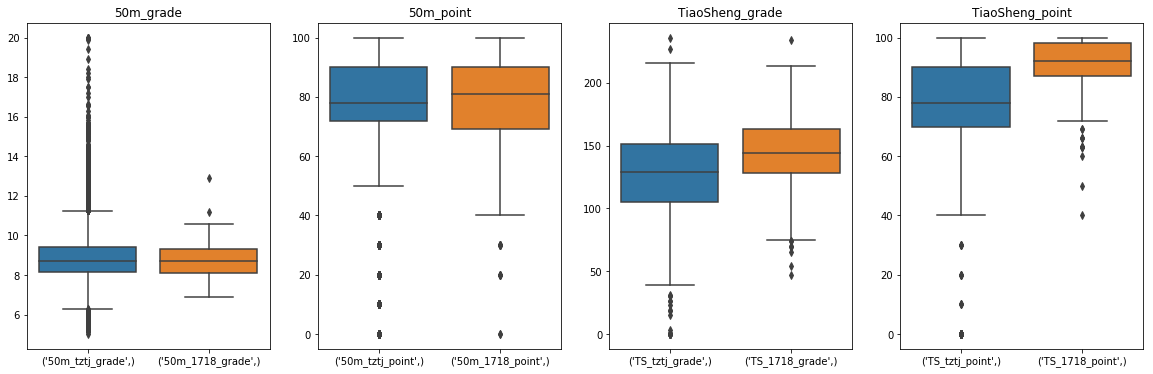

In [9]:
#作出箱线图
fig,(a,b,c,d)=plt.subplots(1,4,figsize=(20,6))
sns.boxplot(data=dc7[['50m_tztj_grade','50m_1718_grade']],ax=a)
a.set_title('50m_grade')
sns.boxplot(data=dc7[['50m_tztj_point','50m_1718_point']],ax=b)
b.set_title('50m_point')
sns.boxplot(data=dc7[['TS_tztj_grade','TS_1718_grade']],ax=c)
c.set_title('TiaoSheng_grade')
sns.boxplot(data=dc7[['TS_tztj_point','TS_1718_point']],ax=d)
d.set_title('TiaoSheng_point')
#plt.xticks(rotation='vertical')

上图的箱线图主要包含五个数据节点，每一个“小箱子”代表数据从大到小排列共有5道横线，分别代表这组数据的 最大值（max），上四分位数（75%），中位数（50%），下四分位数（25%），最小值，图外的小黑点被认为是异常值（偏离大部分数据的点）。箱子内部涂色数据代表这组数据的25%-75%这一部分，因此箱子的宽度在一定程度上反映了数据的波动程度，由于它们受极值和异常值影响小，对比更具有代表性。

上面4个箱线图分别是关于“50m成绩”，“50m分数”，“跳绳成绩”和“跳绳分数”四个方面对“体质体检”和“过程性评价”两组测量数据进行对比，其中蓝色“小箱子”代表“体质体检”，黄色“小箱子”代表“过程性评价”。

通过上图，可以看出对于初一学生：
*  “50m成绩”- 两组数据平均水平（中位数），波动程度（箱子宽度）都很类似；“体质体检”异常值相对多出很多=〉可能是体质体检数据总数（10万）远多于“过程性评价”（243个）；
*  “50m分数”- 两组数据平均水平（中位数）类似；“过程性评价”波动程度（箱子宽度）更大=〉主要集中在最小值-50%之间；而“体质体检”异常值更多=〉可能是体质体检数据总数（10万）远多于“过程性评价”（243个）；
*  “跳绳成绩”-“过程性评价”平均水平（中位数），波动程度（箱子宽度）结果都好于“体质体检”，但仍有部分重合，差别不明显 
*  “跳绳分数”- “过程性评价”平均水平（中位数），波动程度（箱子宽度）结果都好于“体质体检”，仅有小部分重合，差别较为明显


总结：
对初一学生，“体质体检”与“过程性评价”
*  成绩：平均水平与波动程度差别不大
*  分数：存在部分项目平均水平与波动程度有出入
 

## 四、 初二学生“体质体检”与“过程性评价”结果对比

* 注意：仅使用第一、二部分得到的数据进行分析（只用在初二年级的数据，未用其它的数据，如对“体质体检”的“立定跳远”和“引体向上”只用了初二的成绩）

初二学生“体质体检”与“过程性评价”相同项目的数据合并：

In [10]:
# 初二学生“体质体检”与“过程性评价”相同项目的数据合并
dc8 = data_origin8[['TS_grade','TS_point','LDTY_grade','LDTY_point','YTXS_point']]
dc8[['TS_1718_grade','TS_1718_point','LDTY_1718_grade','LDTY_1718_point','YTXS_1718_point']]=df8[['TiaoSheng_grade','TiaoSheng_point','LiDingTiaoYuan_grade','LiDingTiaoYuan_point','DanGang_point']]
dc8.columns = [['TS_tztj_grade','TS_tztj_point','LDTY_tztj_grade','LDTY_tztj_point','YTXS_tztj_point','TS_1718_grade','TS_1718_point','LDTY_1718_grade','LDTY_1718_point','YTXS_1718_point']]
dc8=dc8[['TS_tztj_grade','TS_1718_grade','TS_tztj_point','TS_1718_point','LDTY_tztj_grade','LDTY_1718_grade','LDTY_tztj_point','LDTY_1718_point','YTXS_tztj_point','YTXS_1718_point']]
dc8.describe()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,TS_tztj_grade,TS_1718_grade,TS_tztj_point,TS_1718_point,LDTY_tztj_grade,LDTY_1718_grade,LDTY_tztj_point,LDTY_1718_point,YTXS_tztj_point,YTXS_1718_point
count,0.0,48.000000,0.0,48.000000,82666.000000,53.000000,82666.0000,53.000000,43219.000000,45.000000
mean,NaN,153.625000,NaN,93.041667,181.572046,186.660377,71.9351,66.981132,33.321965,87.711111
std,NaN,23.978381,NaN,6.661922,35.963322,24.035185,19.9250,19.122571,32.413107,5.964372
min,NaN,100.000000,NaN,75.000000,0.000000,140.000000,0.0000,0.000000,0.000000,70.000000
25%,NaN,135.000000,NaN,90.000000,165.000000,170.000000,66.0000,63.000000,0.000000,85.000000
50%,NaN,152.500000,NaN,94.000000,182.000000,189.000000,74.0000,66.000000,20.000000,90.000000
75%,NaN,172.750000,NaN,100.000000,201.000000,202.000000,85.0000,75.000000,60.000000,90.000000
max,NaN,204.000000,NaN,100.000000,345.000000,240.000000,100.0000,98.000000,100.000000,100.000000


上表是对初二学生“体质体检”与“过程性评价”的数据量，平均值，标准差，最大，最小，25%，中值，75%等信息的对比，通过下面的箱线图使对比更加直观明显。

*  注意：上表中“体质体检”的所有“跳绳成绩”和“跳绳分数”均为NaN（空值），表示“体质体检”数据库中并没有初二学生的“跳绳”成绩和得分， 或初二学生“体质体检”不含“跳绳”项目（但初一学生“体质体检”中含有“跳绳”项目）。

Text(0.5,1,'YinTiXiangShang_point')

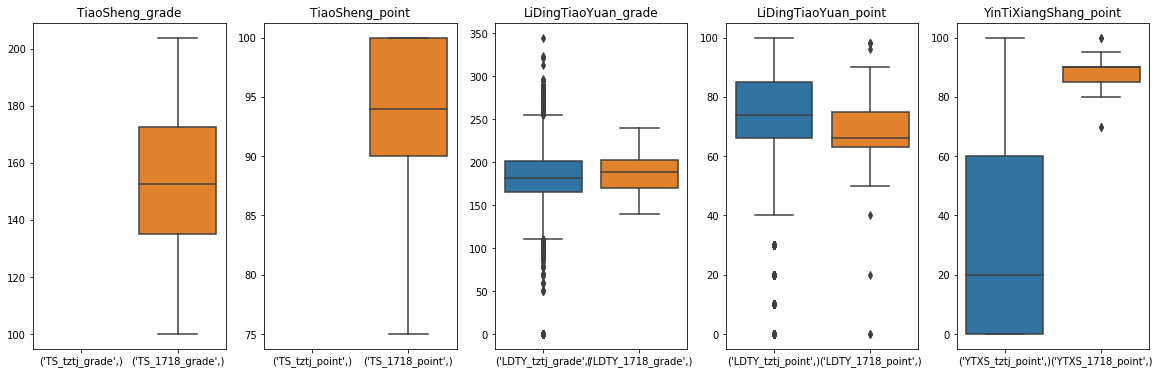

In [11]:
#绘制箱线图
fig2,(a,b,c,d,e)=plt.subplots(1,5,figsize=(20,6))
sns.boxplot(data=dc8[['TS_tztj_grade','TS_1718_grade']],ax=a)
a.set_title('TiaoSheng_grade')
sns.boxplot(data=dc8[['TS_tztj_point','TS_1718_point']],ax=b)
b.set_title('TiaoSheng_point')
sns.boxplot(data=dc8[['LDTY_tztj_grade','LDTY_1718_grade']],ax=c)
c.set_title('LiDingTiaoYuan_grade')
sns.boxplot(data=dc8[['LDTY_tztj_point','LDTY_1718_point']],ax=d)
d.set_title('LiDingTiaoYuan_point')
sns.boxplot(data=dc8[['YTXS_tztj_point','YTXS_1718_point']],ax=e)
e.set_title('YinTiXiangShang_point')

上图的箱线图主要包含五个数据节点，每一个“小箱子”代表数据从大到小排列共有5道横线，分别代表这组数据的 最大值（max），上四分位数（75%），中位数（50%），下四分位数（25%），最小值，图外的小黑点被认为是异常值（偏离大部分数据的点）。箱子内部涂色数据代表这组数据的25%-75%这一部分，因此箱子的宽度在一定程度上反映了数据的波动程度，由于它们受极值和异常值影响小，对比更具有代表性。

上面5个箱线图分别是关于“跳绳成绩”，“跳绳分数”，“立定跳远成绩”，“立定跳远分数”和“引体向上分数”五个方面对“体质体检”和“过程性评价”两组测量数据进行对比，其中蓝色“小箱子”代表“体质体检”，黄色“小箱子”代表“过程性评价”。

通过上图，可以看出对于初二学生：
* “跳绳成绩”- “体质体检”中不含初二学生“跳绳成绩”，无法比较；
* “跳绳分数”- “体质体检”中不含初二学生“跳绳分数”，无法比较；
* “立定跳远成绩”-两组数据平均水平（中位数），波动程度（箱子宽度）都很类似；“体质体检”异常值相对多出很多=〉可能是体质体检数据总数（8万）远多于“过程性评价”（53个）；
* “立定跳远分数”- “过程性评价”平均水平（中位数）低于“体质体检”，且“过程性评价”波动程度（箱子宽度）较小=〉有小部分重合，差别较为明显
* “引体向上分数”-“过程性评价”平均水平（中位数）和波动程度（箱子宽度）均好于“体质体检”=〉几乎没有重合，存在非常明显的差别
 
 
 总结：
对初二学生，“体质体检”与“过程性评价”
*  成绩：平均水平与波动程度差别不大
*  分数：部分项目平均水平与波动程度存在明显差别

## 五、（不分年级）“体质体检”与“过程性评价”结果综合对比

* 注意：使用所有来自“体质体检”和“过程性评价”的数据进行分析（由于没有对初一、初二分别分析，所以不损失数据，因此给出的数据与上两个部分相比不会完全相同，会有些许差异）。

### 1) 五值对比（最大值，最小值，中值，25%，75%）以及箱线图

In [12]:
# 导入数据库
data_total1 = pd.read_csv("/Users/yawenhan/Documents/Python/盛学原始数据/17-18_grade7and8.csv")
df = pd.DataFrame(data_total1)
del data_total1['Gender']

In [13]:
data_total2=data_origin[['50m_grade','50m_point','TS_grade','TS_point','LDTY_grade','LDTY_point','YTXS_point']]
data_total2.columns=[['50m_tztj_grade','50m_tztj_point','TS_tztj_grade','TS_tztj_point','LDTY_tztj_grade','LDTY_tztj_point','YTXS_tztj_point']]

In [14]:
data_total2[['50m_1718_grade','50m_1718_point','TS_1718_grade','TS_1718_point','LDTY_1718_grade','LDTY_1718_point','YTXS_1718_point']]=data_total1[['50m_grade','50m_point','TiaoSheng_grade','TiaoSheng_point','LiDingTiaoYuan_grade','LiDingTiaoYuan_point','DanGang_point']]
data_total2=data_total2[['50m_1718_grade','50m_tztj_grade','50m_1718_point','50m_tztj_point','TS_1718_grade','TS_tztj_grade','TS_1718_point','TS_tztj_point','LDTY_1718_grade','LDTY_tztj_grade','LDTY_1718_point','LDTY_tztj_point','YTXS_1718_point','YTXS_tztj_point']]

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [15]:
data_total2.describe()#五值对比

,50m_1718_grade,50m_tztj_grade,50m_1718_point,50m_tztj_point,TS_1718_grade,TS_tztj_grade,TS_1718_point,TS_tztj_point,LDTY_1718_grade,LDTY_tztj_grade,LDTY_1718_point,LDTY_tztj_point,YTXS_1718_point,YTXS_tztj_point
count,384.000000,249744.000000,384.000000,249744.000000,715.000000,1171.000000,715.000000,1171.000000,352.000000,252824.000000,342.000000,252824.000000,334.000000,133717.000000
mean,8.672500,8.547133,77.523438,80.283042,148.464336,126.111016,91.377622,77.228864,177.423295,180.737264,63.380117,72.251009,88.796407,33.376773
std,0.880823,1.012675,19.432268,15.695669,28.788854,36.075059,9.402756,18.789992,31.593119,36.059923,21.457630,19.584888,7.099498,33.000374
min,6.700000,5.000000,0.000000,0.000000,33.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,7.900000,75.000000,72.000000,132.000000,105.000000,88.500000,70.000000,160.000000,165.000000,60.000000,66.000000,85.000000,0.000000
50%,8.700000,8.500000,81.000000,78.000000,150.000000,129.000000,92.000000,78.000000,176.000000,180.000000,66.000000,76.000000,90.000000,30.000000
75%,9.200000,9.130000,90.000000,95.000000,171.000000,151.000000,100.000000,90.000000,196.250000,200.000000,75.000000,85.000000,93.000000,60.000000
max,12.900000,20.000000,100.000000,100.000000,234.000000,236.000000,100.000000,100.000000,253.000000,360.000000,100.000000,100.000000,100.000000,100.000000


上表是对初一、初二全体学生“体质体检”与“过程性评价”的数据量，平均值，标准差，最大，最小，25%，中值，75%等信息的对比，通过下面的箱线图使对比更加直观明显。

Text(0.5,1,'YinTiXiangShang_point')

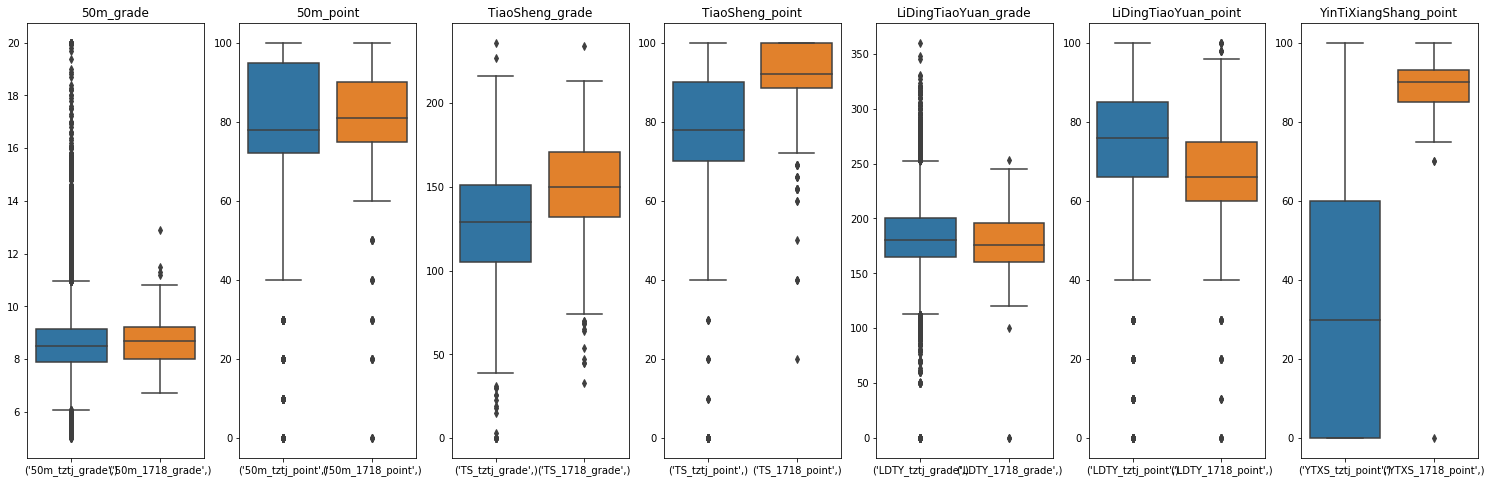

In [16]:
#绘制箱线图（中心位置，发散程度，偏差程度）
fig3,(a,b,c,d,e,f,g)=plt.subplots(1,7,figsize=(26,8))
sns.boxplot(data=data_total2[['50m_tztj_grade','50m_1718_grade']],ax=a)
a.set_title('50m_grade')
sns.boxplot(data=data_total2[['50m_tztj_point','50m_1718_point']],ax=b)
b.set_title('50m_point')
sns.boxplot(data=data_total2[['TS_tztj_grade','TS_1718_grade']],ax=c)
c.set_title('TiaoSheng_grade')
sns.boxplot(data=data_total2[['TS_tztj_point','TS_1718_point']],ax=d)
d.set_title('TiaoSheng_point')
sns.boxplot(data=data_total2[['LDTY_tztj_grade','LDTY_1718_grade']],ax=e)
e.set_title('LiDingTiaoYuan_grade')
sns.boxplot(data=data_total2[['LDTY_tztj_point','LDTY_1718_point']],ax=f)
f.set_title('LiDingTiaoYuan_point')
sns.boxplot(data=data_total2[['YTXS_tztj_point','YTXS_1718_point']],ax=g)
g.set_title('YinTiXiangShang_point')

上图的箱线图主要包含五个数据节点，每一个“小箱子”代表数据从大到小排列共有5道横线，分别代表这组数据的 最大值（max），上四分位数（75%），中位数（50%），下四分位数（25%），最小值，图外的小黑点被认为是异常值（偏离大部分数据的点）。箱子内部涂色数据代表这组数据的25%-75%这一部分，因此箱子的宽度在一定程度上反映了数据的波动程度，由于它们受极值和异常值影响小，对比更具有代表性。

上面5个箱线图分别是关于“50m成绩”，“50m分数”，“跳绳成绩”，“跳绳分数”，“立定跳远成绩”，“立定跳远分数”和“引体向上分数”七个方面对“体质体检”和“过程性评价”两组测量数据进行对比，其中蓝色“小箱子”代表“体质体检”，黄色“小箱子”代表“过程性评价”。

通过上图，可以看出对于初一、初二全体学生：
*  “50m成绩”-两组数据平均水平（中位数），波动程度（箱子宽度）都很类似；“体质体检”异常值相对多出很多=〉可能是体质体检数据总数（25万）远多于“过程性评价”（384个）；
*  “50m分数”- 两组数据平均水平（中位数）类似；“过程性评价”波动程度（箱子宽度）更小=〉主要集中在50%-75%之间， 与初一“50m”波动程度恰好相反；
*  “跳绳成绩”- “过程性评价”平均水平（中位数）高于“体质体检”，“过程性评价”波动程度（箱子宽度）较小=〉有小部分重合，差别较为明显；
*  “跳绳分数”- “过程性评价”平均水平（中位数）高于“体质体检”，“过程性评价”波动程度（箱子宽度）较小=〉有小部分重合，差别较为明显；
*  “立定跳远成绩”-两组数据平均水平（中位数），波动程度（箱子宽度）都很类似；“体质体检”异常值相对多出很多=〉可能是体质体检数据总数（25万）远多于“过程性评价”（352个）；
*  “立定跳远分数”- “过程性评价”平均水平（中位数）低于“体质体检”，且“过程性评价”波动程度（箱子宽度）较小=〉有小部分重合，差别较为明显
*  “引体向上分数”-“过程性评价”平均水平（中位数）和波动程度（箱子宽度）均好于“体质体检”=〉几乎没有重合，存在非常明显的差别


### 2）平均值对比

上面主要是对五值及数据分布的比较，下面是对平均值的比较分析,首先先大致了解一下各项目的平均值:

In [17]:
data_total2.mean()#均值对比

50m_1718_grade       8.672500
50m_tztj_grade       8.547133
50m_1718_point      77.523438
50m_tztj_point      80.283042
TS_1718_grade      148.464336
TS_tztj_grade      126.111016
TS_1718_point       91.377622
TS_tztj_point       77.228864
LDTY_1718_grade    177.423295
LDTY_tztj_grade    180.737264
LDTY_1718_point     63.380117
LDTY_tztj_point     72.251009
YTXS_1718_point     88.796407
YTXS_tztj_point     33.376773
dtype: float64

为了更直观清晰的比较各个项目分数/成绩之间的平均值关系，下面将所有项目分为2.1）项目成绩，和2.2）项目分数进行平均值的比较分析。

In [18]:
## 17-18与tztj成绩对比
# 摘出部分数据到对应表格
g1718 = data_total2[['50m_1718_grade','TS_1718_grade','LDTY_1718_grade']]#1718 grade
p1718 = data_total2[['50m_1718_point','TS_1718_point','LDTY_1718_point','YTXS_1718_point']]#1718 point
gtztj = data_total2[['50m_tztj_grade','TS_tztj_grade','LDTY_tztj_grade']]#tztj grade
ptztj = data_total2[['50m_tztj_point','TS_tztj_point','LDTY_tztj_point','YTXS_tztj_point']]#tztj point

####     2.1）项目成绩平均值比较分析

“体质体检”与“过程性评价”的3个相同项目“50m”,“跳绳”，“立定跳远”成绩平均值对比：

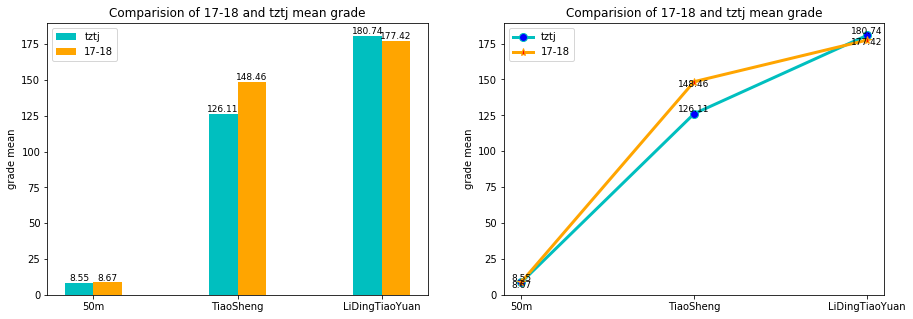

In [19]:
# 17-18与tztj的3项50m,跳绳，立定跳远 成绩平均值对比
fig4,(a,b)=plt.subplots(1,2,figsize=(15,5))
a=plt.subplot(1,2,1)
name_list=['50m','TiaoSheng','LiDingTiaoYuan']
x =list(range(len(gtztj.mean())))
a.bar(x, gtztj.mean(), width=0.2,label='tztj',fc = 'c')
for i in range(len(x)):
    plt.text(x[i], list(gtztj.mean())[i], '%.2f' % list(gtztj.mean())[i], ha='center', va= 'bottom',fontsize=9)
    x[i] = x[i] + 0.2
    plt.text(x[i], list(g1718.mean())[i], '%.2f' % list(g1718.mean())[i], ha='center', va= 'bottom',fontsize=9)
a.bar(x, g1718.mean(), width=0.2,label='17-18',fc = 'orange')
plt.ylabel('grade mean')
plt.title('Comparision of 17-18 and tztj mean grade') 

for i in range(len(x)):
    x[i] = x[i] -0.1
plt.xticks(x, name_list )
plt.legend()

b=plt.subplot(1,2,2)
x =list(range(len(g1718.mean())))
b.plot(x,gtztj.mean(),label='tztj',linewidth=3,color='c',marker='o', markerfacecolor='b',markersize=8) 
b.plot(x,g1718.mean(),label='17-18',linewidth=3, color='orange',marker='*',markerfacecolor='r',markersize=8) 
plt.ylabel('grade mean') 
plt.title('Comparision of 17-18 and tztj mean grade') 
plt.xticks(x, name_list )
for i in range(len(x)):
    plt.text(x[i], list(gtztj.mean())[i], '%.2f' % list(gtztj.mean())[i], ha='center', va= 'bottom',fontsize=9)
    plt.text(x[i], list(g1718.mean())[i]-5, '%.2f' % list(g1718.mean())[i], ha='center', va= 'bottom',fontsize=9)
plt.legend() 
plt.show() 

 上面两图分别通过柱状图，和折线图的形式对项目成绩的平均值进行比较。二者基本呈现相一致的变化趋势，表明二者可能相关程度较高。其中，“过程性评价”在“50m”和“跳绳”项目的平均值均高于“体质体检”，只有“立定跳远”平均值稍低于“体质体检”。=〉所有项目成绩差别都不大。

#### 2.2）项目分数平均值比较分析

“体质体检”与“过程性评价”的4个相同项目“50m”,“跳绳”，“立定跳远”，“引体向上”分数平均值对比：

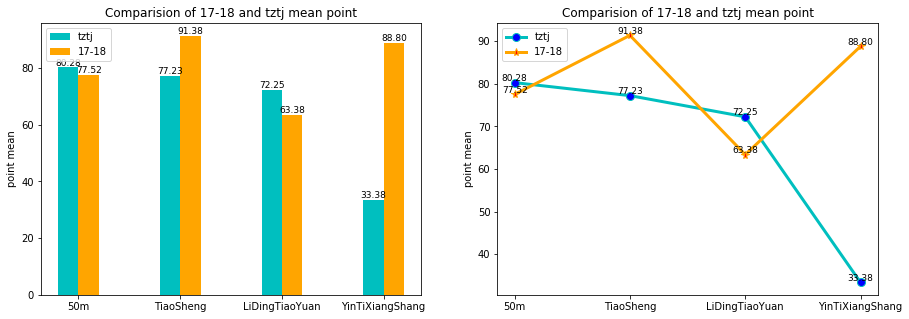

In [20]:
# 17-18与tztj的4项50m,跳绳，立定跳远, 引体向上 最终得分平均值对比
fig5,(a,b)=plt.subplots(1,2,figsize=(15,5))
a=plt.subplot(1,2,1)
name_list=['50m','TiaoSheng','LiDingTiaoYuan','YinTiXiangShang']
x =list(range(len(ptztj.mean())))
a.bar(x, ptztj.mean(), width=0.2,label='tztj',fc = 'c')
for i in range(len(x)):
    plt.text(x[i], list(ptztj.mean())[i], '%.2f' % list(ptztj.mean())[i], ha='center', va= 'bottom',fontsize=9)
    x[i] = x[i] + 0.2
    plt.text(x[i], list(p1718.mean())[i], '%.2f' % list(p1718.mean())[i], ha='center', va= 'bottom',fontsize=9)
a.bar(x, p1718.mean(), width=0.2,label='17-18',fc = 'orange')
plt.ylabel('point mean')
plt.title('Comparision of 17-18 and tztj mean point') 

for i in range(len(x)):
    x[i] = x[i] -0.1
plt.xticks(x, name_list )
plt.legend()

b=plt.subplot(1,2,2)
x =list(range(len(p1718.mean())))
b.plot(x,ptztj.mean(),label='tztj',linewidth=3,color='c',marker='o', markerfacecolor='b',markersize=8) 
b.plot(x,p1718.mean(),label='17-18',linewidth=3, color='orange',marker='*',markerfacecolor='r',markersize=8) 
plt.ylabel('point mean') 
plt.title('Comparision of 17-18 and tztj mean point') 
plt.xticks(x, name_list )
for i in range(len(x)):
    plt.text(x[i], list(ptztj.mean())[i], '%.2f' % list(ptztj.mean())[i], ha='center', va= 'bottom',fontsize=9)
    plt.text(x[i], list(p1718.mean())[i], '%.2f' % list(p1718.mean())[i], ha='center', va= 'bottom',fontsize=9)
plt.legend() 
plt.show() 

上面两图分别通过柱状图，和折线图的形式对项目分数的平均值进行比较。二者变化趋势差别较大，表明二者相关性可能不大。其中，“过程性评价”在“跳绳”和“引体向上”项目分数的平均值均明显高于“体质体检”，而在“50m”和“立定跳远”项目分数的平均值稍低于“体质体检”。=〉在“引体向上”项目成绩差别明显，不可忽略；而其它项目差别相对较小

总结：

 * 通过以上对所有项目平均成绩/分数的对比，可以总结：“体质体检”和“过程性评价”中各项目成绩平均值相似程度较高，但各项目分数平均值差别较大，数据离散程度也有差别 =〉（更多的可能是对不同体质测量项目的 给分标准不同 ）=〉给分严不严  

 * 对于“引体向上”项目成绩差别明显，不可忽略，“体质体检”和“过程性评价”的数据给出了两个比较极端的结果（“体质体检”：33.38，“过程性评价”：88.80）=〉两种猜测：（1）两次给分标准不同，“过程性评价”给分宽容，而“体质体检”给分严格；（2）测量的并不是同一个项目，“过程性评价”初二学生的“单杠”项目 并不等同于 “体质体检”中的“引体向上”项目，故给分差别大。

### 3）直方图对比

最后通过直方图对比“体质体检”和“过程性评价”不同成绩/分数的分布关系。
* 注意： 由于“体质体检”与“过程性评价”两组数据的数据量大小相差过大，每个直方图的有两组纵坐标对应于不同的数据量，以使数据量相差巨大的两组直方图展示在一个直方图中。

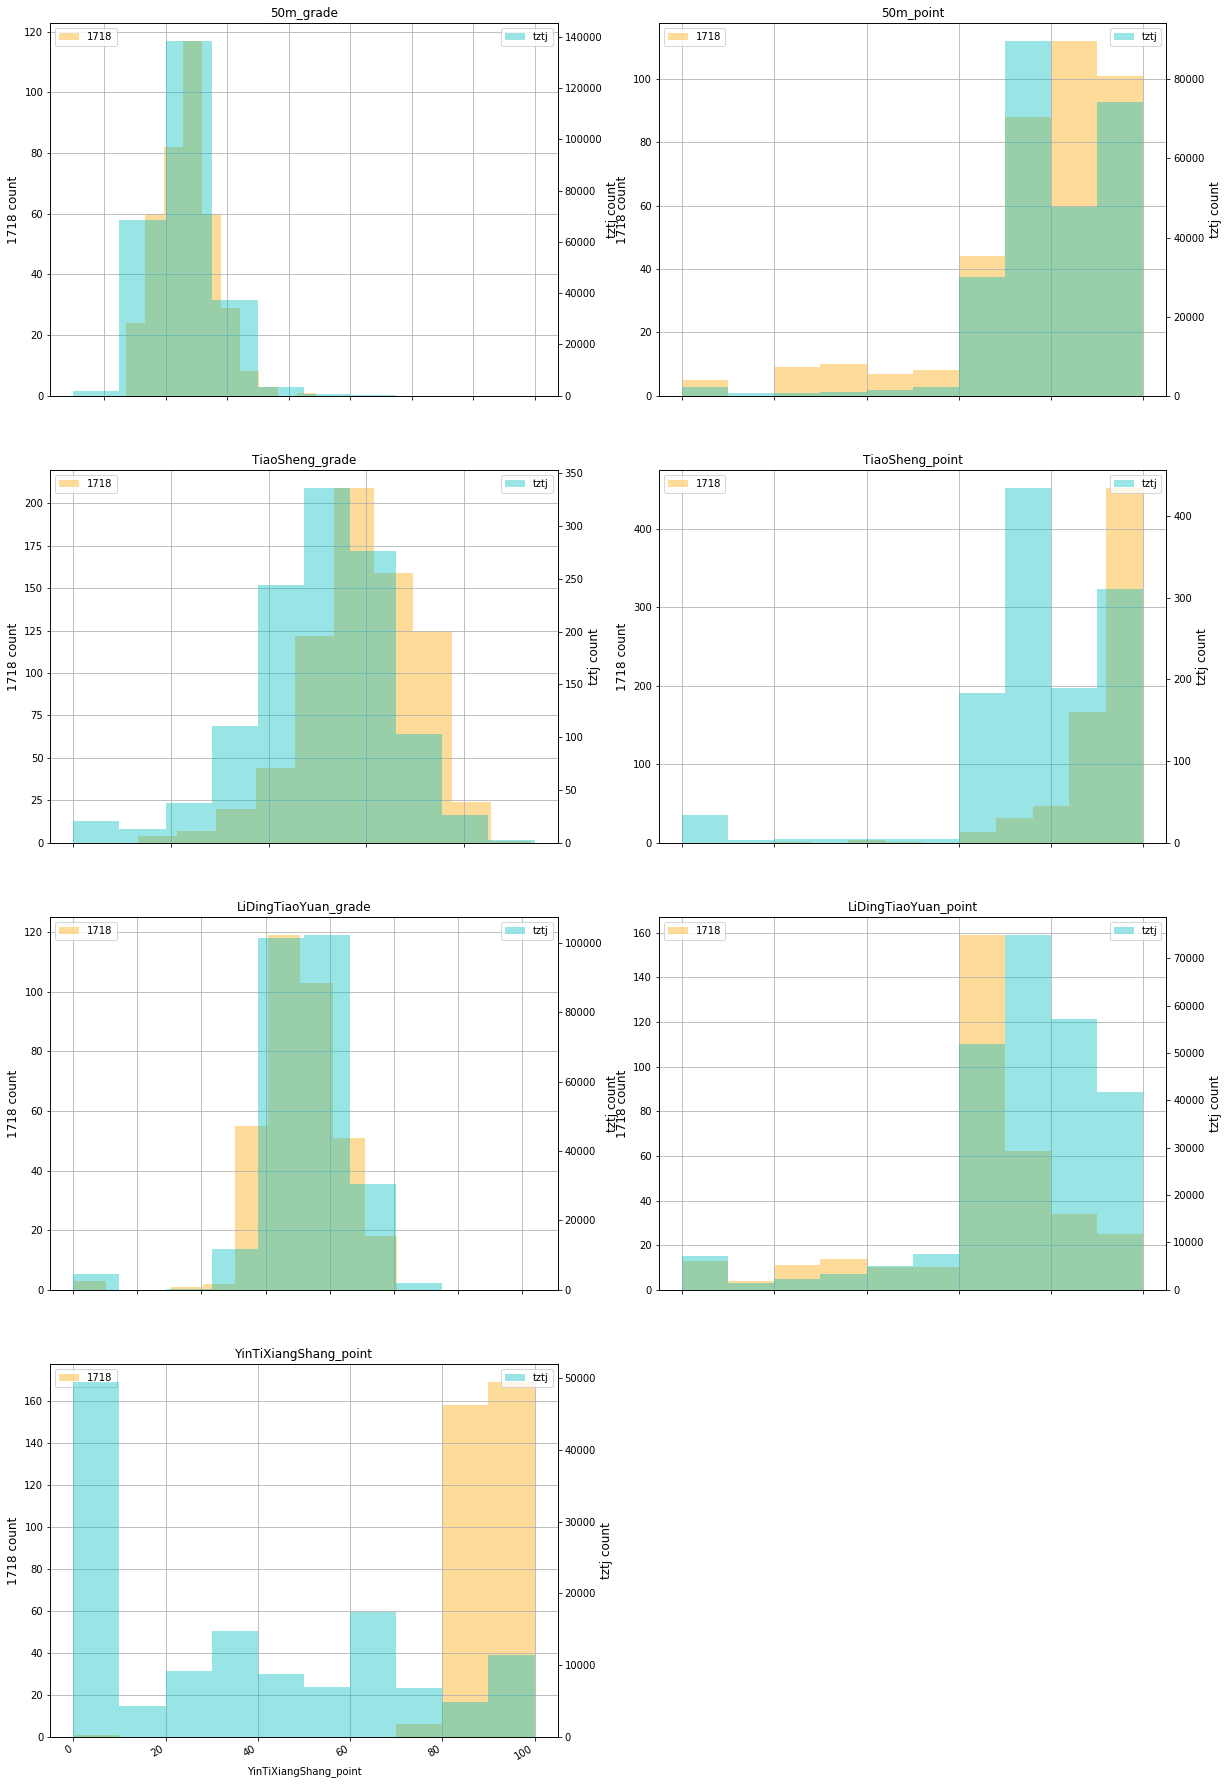

In [21]:

fig=plt.figure(figsize=(20,35))
title=['50m_grade','50m_point','TiaoSheng_grade','TiaoSheng_point','LiDingTiaoYuan_grade','LiDingTiaoYuan_point','YinTiXiangShang_point']
j=0
for i in range(7):
    ax1=fig.add_subplot(4,2,i+1)
    ax1.set_title(title[i])
    ax1.set_xlabel(title[i])
    data_total2.iloc[:,j].hist(alpha=0.4,label='1718',color='orange',ax=ax1)
    plt.legend(loc=2)
    ax2 = ax1.twinx() # 创建第二个坐标轴
    data_total2.iloc[:,j+1].hist(alpha=0.4,label='tztj',color='c',ax=ax2)
    j=j+2
    plt.legend(loc=1)
    ax1.set_ylabel('1718 count',size=12)
    ax2.set_ylabel('tztj count',size=12)
    plt.gcf().autofmt_xdate()#自动适应刻度线密度，包括x轴，y轴
    plt.grid(False)
plt.subplots_adjust(hspace=0.2,wspace=0.2)




上方的7个直方图分别对应于不同的项目成绩/分数，标题表明该项目，横坐标为该项目成绩/分数，左侧纵坐标为“过程性评价”各个项目对应成绩/分数的人数，右侧纵坐标为“体质体检”各个项目对应成绩/分数的人数。

总结：
* 对于前5张图，大部分成绩/分数横坐标区间重合， “过程性评价”在好成绩/高分的分布人数比例更大；
* 对于“立定跳远分数”，大部分成绩/分数横坐标区间重合， “过程性评价”在低成绩/低分的分布人数比例更大；
* 对于“引体向上分数”，大部分成绩/分数横坐标区间分离， “过程性评价”几乎都集中在在高成绩/高分的区间；

## 六、 显著性差异分析

下面通过统计学上的概念对数据差异性做出评价。通常情况下，实验结果达到0.05水平或0.01水平，才可以说数据之间具备了差异显著或是极显著。分别计算“体质体检”和“过程性评价”各项目成绩/分数的置信区间，通过对比置信区间之间是否存在交集，做出差异性评价：存在交集=〉差异不显著；不存在交集=>存在显著性差异。

### 1）“体质体检”和“过程性评价”各项目成绩的置信区间计算及分析
* 对于输出的数据，每列代表一个项目，第一行代表区间左边界，第二行代表区间右边界。例如：[6.94，10.39]为“过程性评价”的“50m”项目成绩的置信区间。 
* 在显著性差异分析中，认为显著性水平（可信度）为0.05，就是要求在用所得样本进行总体参数区间估计的时，应有95%的概率确定它与总体参数一致，简单说就是用100个样本进行区间估计，得到100个区间，其中应有95个区间包括了总体参数。

In [22]:
from scipy import stats
interval1=stats.t.interval(0.95,len(g1718)-1,g1718.mean(),g1718.std())
interval1

(array([  6.94611026,  92.03896175, 115.50163786]),
 array([ 10.39888974, 204.88970958, 239.34495305]))

In [23]:
interval2=stats.t.interval(0.95,len(gtztj)-1,gtztj.mean(),gtztj.std())
interval2

(array([  6.56231677,  55.40487697, 110.06078994]),
 array([ 10.53194864, 196.81715548, 251.41373732]))

“体质体检”和“过程性评价”成绩：置信区间均有交集, 在置信水平为95%的情况下，二者差异不显著，不能否认它们相等.=〉但也不能说明它们代表的数据一致，需要更多的数据来重新分析，作为决策支持

### 2）“体质体检”和“过程性评价”各项目分数的置信区间计算及分析
* 对于输出的数据，每列代表一个项目，第一行代表区间左边界，第二行代表区间右边界。例如：[39.43，115.61]为“过程性评价”的“50m”项目分数的置信区间。 
* 在显著性差异分析中，认为显著性水平（可信度）为0.05，就是要求在用所得样本进行总体参数区间估计的时，应有95%的概率确定它与总体参数一致，简单说就是用100个样本进行区间估计，得到100个区间，其中应有95个区间包括了总体参数。

In [24]:
interval3=stats.t.interval(0.95,len(p1718)-1,p1718.mean(),p1718.std())
interval3

(array([39.43671891, 72.94847482, 21.32374381, 74.88158355]),
 array([115.61015609, 109.80676993, 105.43649011, 102.71123082]))

In [25]:
interval4=stats.t.interval(0.95,len(ptztj)-1,ptztj.mean(),ptztj.std())
interval4

(array([ 49.51995622,  40.40098768,  33.86515783, -31.30306555]),
 array([111.04612745, 114.05674076, 110.63685938,  98.05661222]))

“体质体检”和“过程性评价”分数：置信区间均有交集, 在置信水平为95%的情况下，二者差异不显著，不能否认它们相等.=〉但也不能说明它们代表的数据一致，需要更多的数据来重新分析，作为决策支持